# Stock Portfolio Analysis of Aerospace Industry

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import pandas_datareader.data as web
from datetime import datetime as dt
import statsmodels.api as sm

In [4]:
import yfinance as yf

# Boeing Analysis

In [5]:
# input
symbol = 'BA'
start = '2010-01-02'
end = '2020-12-31'

# Read data 
data = yf.download(symbol,start,end)

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,55.720001,56.389999,54.799999,56.180000,43.441975,6186700
2010-01-05,56.250000,58.279999,56.000000,58.020000,44.864773,8867800
2010-01-06,58.230000,59.990002,57.880001,59.779999,46.225727,8836500
2010-01-07,59.509998,62.310001,59.020000,62.200001,48.097031,14379100
2010-01-08,61.540001,61.779999,60.860001,61.599998,47.633064,7146600


In [6]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,219.550003,224.399994,219.320007,219.690002,219.690002,10869000
2020-12-24,219.619995,219.880005,216.050003,217.149994,217.149994,6398500
2020-12-28,218.190002,219.199997,215.160004,216.089996,216.089996,9090600
2020-12-29,218.300003,221.679993,215.399994,216.250000,216.250000,14593800
2020-12-30,216.360001,218.550003,214.369995,216.669998,216.669998,10812600


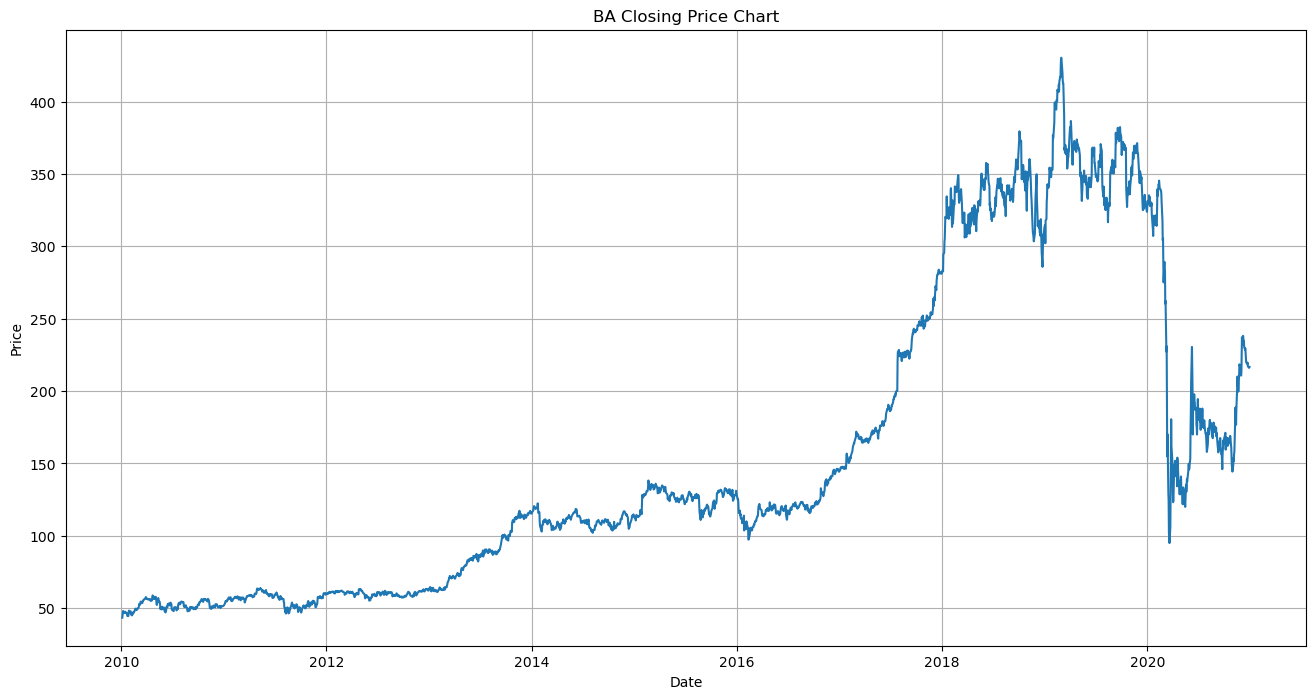

In [34]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('BA Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('stanalysis\static\BA_Closing_Price_Chart.png')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [9]:
# input
symbol = 'BA'
start = '2010-01-01'
end = '2020-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,55.720001,56.389999,54.799999,56.180000,43.441975,6186700
2010-01-05,56.250000,58.279999,56.000000,58.020000,44.864773,8867800
2010-01-06,58.230000,59.990002,57.880001,59.779999,46.225727,8836500
2010-01-07,59.509998,62.310001,59.020000,62.200001,48.097031,14379100
2010-01-08,61.540001,61.779999,60.860001,61.599998,47.633064,7146600


# BA Monthly Returns
(last ten years)

In [10]:
monthly = dataset.asfreq('BM')
monthly['Returns'] = dataset['Adj Close'].pct_change().dropna()
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2010-01-29,62.799999,63.400002,60.320000,60.599998,46.859806,8725400.0,-0.031330
2010-02-26,63.090000,63.880001,63.029999,63.160000,49.172794,4416000.0,0.004613
2010-03-31,72.919998,73.059998,71.949997,72.610001,56.530022,5884600.0,-0.012512
2010-04-30,73.800003,74.480003,72.260002,72.430000,56.389893,5600900.0,-0.018431
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
monthly['Month_Name'] = monthly.index.strftime("%b")
monthly['Month_Name_Year'] = monthly.index.strftime("%b-%Y")

In [12]:
monthly = dataset.asfreq('BM')
monthly['Returns'] = dataset['Adj Close'].pct_change().dropna()
monthly.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2010-01-29,62.799999,63.400002,60.320000,60.599998,46.859806,8725400.0,-0.031330
2010-02-26,63.090000,63.880001,63.029999,63.160000,49.172794,4416000.0,0.004613
2010-03-31,72.919998,73.059998,71.949997,72.610001,56.530022,5884600.0,-0.012512
2010-04-30,73.800003,74.480003,72.260002,72.430000,56.389893,5600900.0,-0.018431
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import calendar
import datetime

monthly = monthly.reset_index()
monthly['Month'] = monthly["Date"].dt.month

In [14]:
monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month
0,2010-01-29,62.799999,63.400002,60.320000,60.599998,46.859806,8725400.0,-0.031330,1
1,2010-02-26,63.090000,63.880001,63.029999,63.160000,49.172794,4416000.0,0.004613,2
2,2010-03-31,72.919998,73.059998,71.949997,72.610001,56.530022,5884600.0,-0.012512,3
3,2010-04-30,73.800003,74.480003,72.260002,72.430000,56.389893,5600900.0,-0.018431,4
4,2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [15]:
monthly.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Month
126,2020-07-31,161.550003,163.399994,156.259995,158.000000,158.000000,30286700.0,-0.024390,7
127,2020-08-31,174.649994,175.270004,171.699997,171.820007,171.820007,16264300.0,-0.022639,8
128,2020-09-30,164.500000,170.979996,164.110001,165.259995,165.259995,37708000.0,0.010147,9
129,2020-10-30,147.199997,149.169998,141.580002,144.389999,144.389999,15374700.0,-0.026300,10
130,2020-11-30,215.699997,217.779999,208.520004,210.710007,210.710007,16501900.0,-0.026744,11


In [16]:
from matplotlib import dates as mdates
import datetime as dt

monthly['ReturnsPositive'] = 0 < monthly['Returns']
monthly['Date'] = pd.to_datetime(monthly['Date'])
monthly['Date'] = monthly['Date'].apply(mdates.date2num)

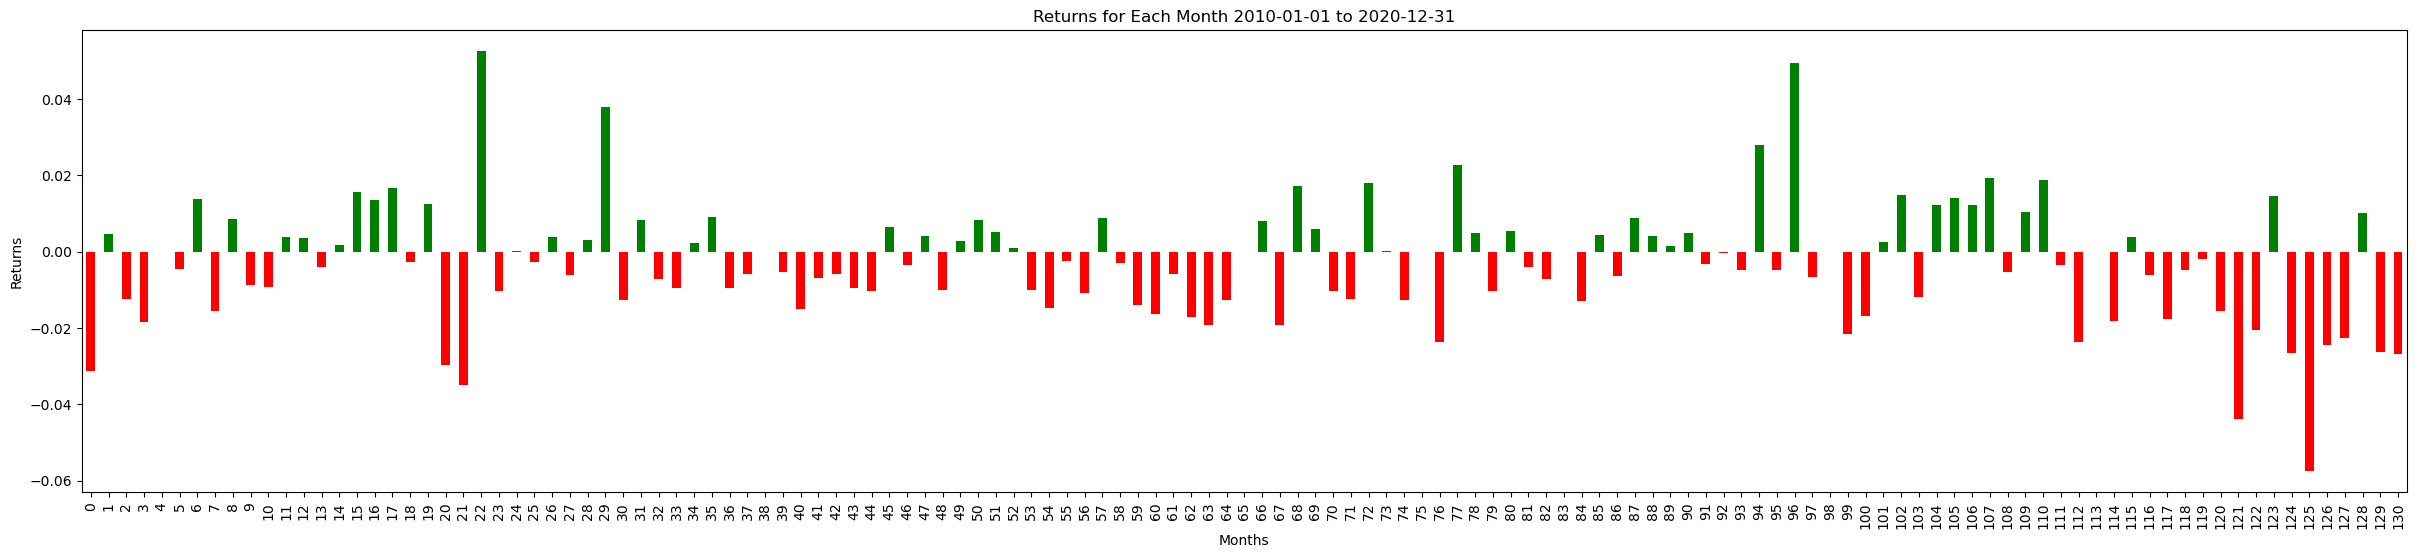

In [17]:
colors = monthly.ReturnsPositive.map({True: 'g', False: 'r'})
monthly['Returns'].plot(kind='bar', color = colors, figsize=(30,6))
plt.xlabel("Months")
plt.ylabel("Returns")
plt.title("Returns for Each Month " + start + ' to ' + end)
plt.show()

# BA Annual Returns 
(Last 10 years)

In [18]:
yearly = dataset.asfreq('BA')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [19]:
yearly = yearly.reset_index()

In [20]:
yearly['Years'] = yearly['Date'].dt.year

In [21]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

In [22]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,734137.0,64.900002,65.290001,64.620003,65.260002,51.724434,2137400,0.003845,2010,True
1,734501.0,73.860001,74.080002,73.239998,73.349998,59.559158,2811800,-0.010255,2011,False
2,734868.0,74.610001,75.410004,74.000000,75.360001,62.666809,4939000,0.008970,2012,True
3,735233.0,136.160004,137.050003,135.740005,136.490005,115.759911,2096000,0.004194,2013,True
4,735598.0,132.250000,132.300003,129.860001,129.979996,112.812035,2712400,-0.014033,2014,False
5,735963.0,145.960007,145.960007,144.500000,144.589996,128.679169,2105200,-0.012431,2015,False
6,736328.0,156.490005,156.789993,154.960007,155.679993,144.337631,2027700,-0.000064,2016,False
7,736692.0,296.940002,297.299988,294.829987,294.910004,281.047150,1824600,-0.004859,2017,False
8,737059.0,320.500000,323.640015,318.750000,322.500000,313.372223,3557700,0.019344,2018,True
9,737424.0,325.410004,326.570007,323.320007,325.760010,323.833313,4958800,-0.001961,2019,False


In [23]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [24]:
yearly_returns_avg = dataset['Returns'].groupby([dataset.index.year]).mean()

In [25]:
yearly_returns_avg

Date
2010    0.000870
2011    0.000744
2012    0.000272
2013    0.002526
2014   -0.000029
2015    0.000616
2016    0.000572
2017    0.002718
2018    0.000628
2019    0.000297
2020   -0.000075
Name: Returns, dtype: float64

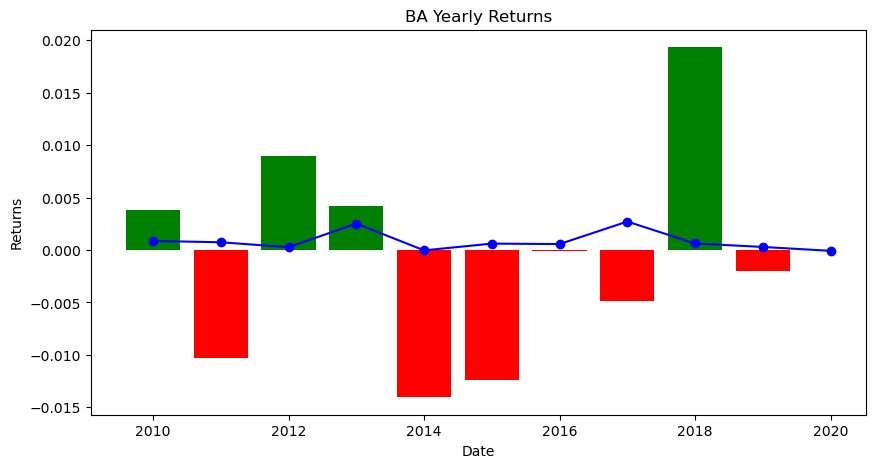

In [46]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('BA Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.savefig('stanalysis\static\BA_Yearly_Returns_Chart.png')
plt.show()

# Stock Moving Average Analysis

In [27]:
dataset['SMA_20'] = dataset['Adj Close'].rolling(20).mean()
dataset['SMA_40'] = dataset['Adj Close'].rolling(40).mean()
dataset['SMA_80'] = dataset['Adj Close'].rolling(80).mean()

In [28]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_20,SMA_40,SMA_80
Date,,,,,,,,,,
2020-12-23,219.550003,224.399994,219.320007,219.690002,219.690002,10869000,0.004159,225.295500,202.01325,182.937251
2020-12-24,219.619995,219.880005,216.050003,217.149994,217.149994,6398500,-0.011562,225.272500,203.73850,183.500376
2020-12-28,218.190002,219.199997,215.160004,216.089996,216.089996,9090600,-0.004881,225.252000,205.43350,184.016751
2020-12-29,218.300003,221.679993,215.399994,216.250000,216.250000,14593800,0.000740,225.528999,207.23000,184.610251
2020-12-30,216.360001,218.550003,214.369995,216.669998,216.669998,10812600,0.001942,225.712000,208.93175,185.180501


NameError: name 'df' is not defined

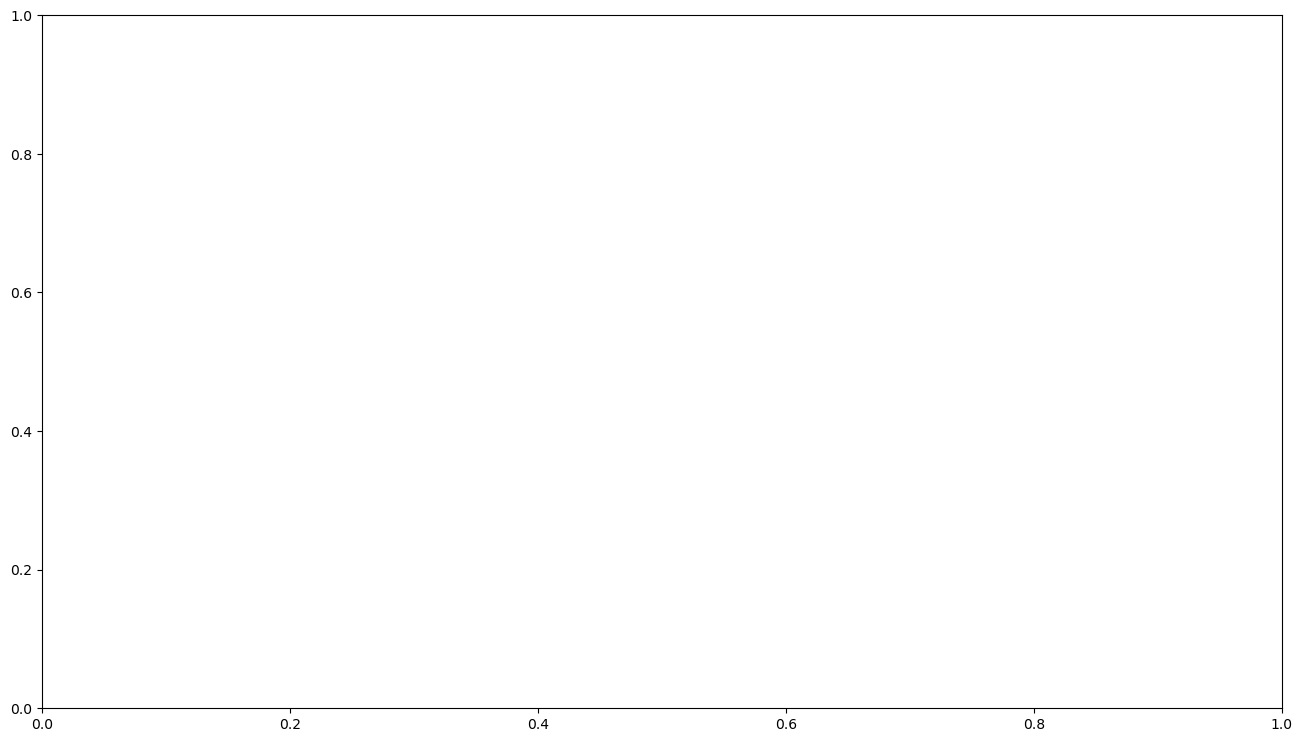

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df.index, df['Adj Close'], label='Price')
ax.plot(df.index, df['SMA_20'], label = '20-days SMA')
ax.plot(df.index, df['SMA_40'], label = '40-days SMA')
ax.plot(df.index, df['SMA_80'], label = '80-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_title('Stock Moving Average Trading Strategy')

# Plot 2020 only¶

In [55]:
new_dates = df['2020-01-01':'2020-12-31']
new_dates.head()

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

In [ ]:
plt.figure(figsize=(16,10))
plt.plot_date(x=new_dates.index ,y=new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

# Northrop Grumman Analysis

In [56]:
# input
symbol = 'noc'
start = '2010-01-02'
end = '2020-12-31'

# Read data 
data = yf.download(symbol,start,end)

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,50.686352,51.382046,50.686352,51.363976,40.020126,1616100
2010-01-05,51.228451,51.906075,51.228451,51.454327,40.090530,1859800
2010-01-06,51.318802,51.698269,51.129066,51.653095,40.245392,2204900
2010-01-07,51.427219,52.366859,51.246521,52.186161,40.660736,4750900
2010-01-08,51.833794,52.493351,51.635025,51.897041,40.435459,1723700


In [57]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,298.290009,302.839996,297.559998,300.660004,300.660004,787000
2020-12-24,300.589996,301.079987,296.929993,299.600006,299.600006,332700
2020-12-28,300.510010,304.709991,299.309998,303.019989,303.019989,603900
2020-12-29,304.809998,305.029999,299.149994,300.989990,300.989990,524500
2020-12-30,301.459991,305.549988,301.320007,302.609985,302.609985,528100


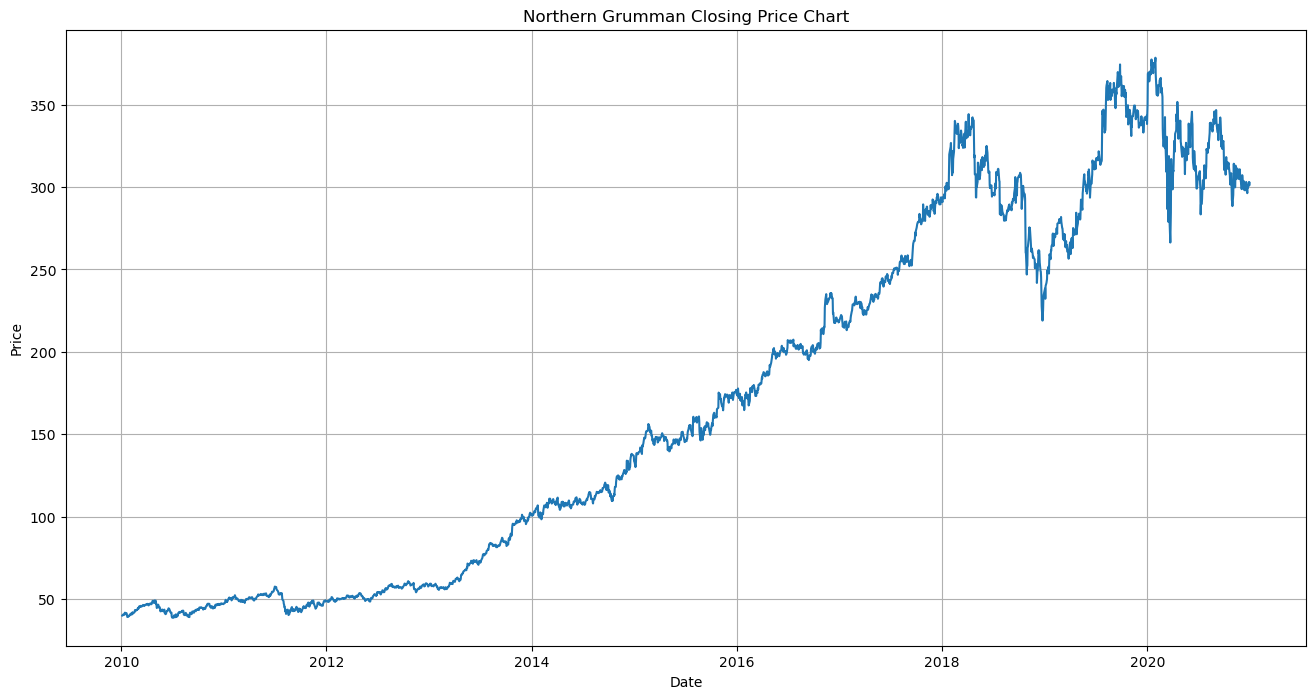

In [58]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Northern Grumman Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Northrop Grumman Annual Returns 
(Last 10 years)

In [59]:
yearly = dataset.asfreq('BA')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [60]:
yearly = yearly.reset_index()

In [61]:
yearly['Years'] = yearly['Date'].dt.year

In [62]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2num)

In [63]:
yearly

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,734137.0,58.203468,58.628117,57.986629,58.528728,47.198536,1192900,0.005276,2010,True
1,734501.0,58.770000,59.150002,58.459999,58.480000,48.804790,1049000,-0.006962,2011,False
2,734868.0,66.510002,67.709999,65.870003,67.580002,58.366062,1682200,0.012283,2012,True
3,735233.0,114.250000,114.779999,113.849998,114.610001,101.793770,965800,0.005969,2013,True
4,735598.0,150.750000,151.210007,147.229996,147.389999,133.745926,1600600,-0.022353,2014,False
5,735963.0,189.460007,190.649994,187.550003,188.809998,174.501663,550600,-0.006682,2015,False
6,736328.0,232.880005,233.339996,231.710007,232.580002,218.477615,740900,-0.000215,2016,False
7,736692.0,308.250000,309.190002,306.910004,306.910004,292.508423,430900,-0.004476,2017,False
8,737059.0,243.309998,246.919998,241.720001,244.899994,237.071686,1111700,0.010939,2018,True
9,737424.0,348.269989,348.980011,342.730011,343.970001,338.274017,907800,-0.014610,2019,False


In [64]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [65]:
yearly_returns_avg = dataset['Returns'].groupby([dataset.index.year]).mean()

In [66]:
yearly_returns_avg

Date
2010    0.000758
2011    0.000263
2012    0.000764
2013    0.002260
2014    0.001156
2015    0.001136
2016    0.000946
2017    0.001193
2018   -0.000690
2019    0.001506
2020   -0.000129
Name: Returns, dtype: float64

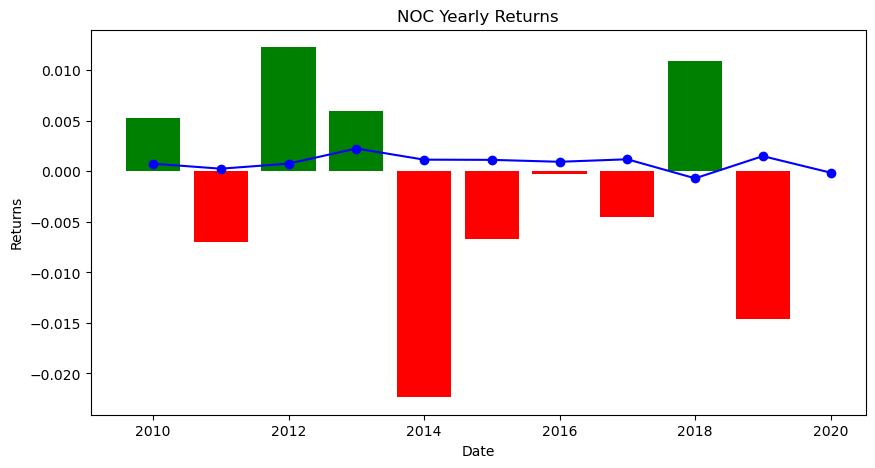

In [68]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('NOC Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.savefig('stanalysis\static\Yearly_NOC_Returns_Chart.png')
plt.show()

# Ratheon Technology Analysis

In [69]:
# input
symbol = 'rtx'
start = '2010-01-02'
end = '2020-12-31'

# Read data 
data = yf.download(symbol,start,end)

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,44.185020,45.223412,43.964756,45.078667,34.661850,9699400
2010-01-05,45.084961,45.084961,44.229076,44.405285,34.144073,7952700
2010-01-06,44.405285,44.575203,44.071743,44.172436,33.965034,7511000
2010-01-07,44.059158,44.443047,43.782253,44.361233,34.110203,6776100
2010-01-08,44.216488,44.493393,44.210194,44.449341,34.177952,7396400


In [70]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,69.790001,71.410004,69.589996,70.720001,70.720001,4312900
2020-12-24,70.949997,70.949997,69.889999,70.269997,70.269997,1758600
2020-12-28,70.699997,71.459999,70.339996,70.629997,70.629997,2938000
2020-12-29,71.000000,71.099998,69.669998,70.339996,70.339996,3670100
2020-12-30,70.500000,71.639999,70.339996,71.360001,71.360001,5015500


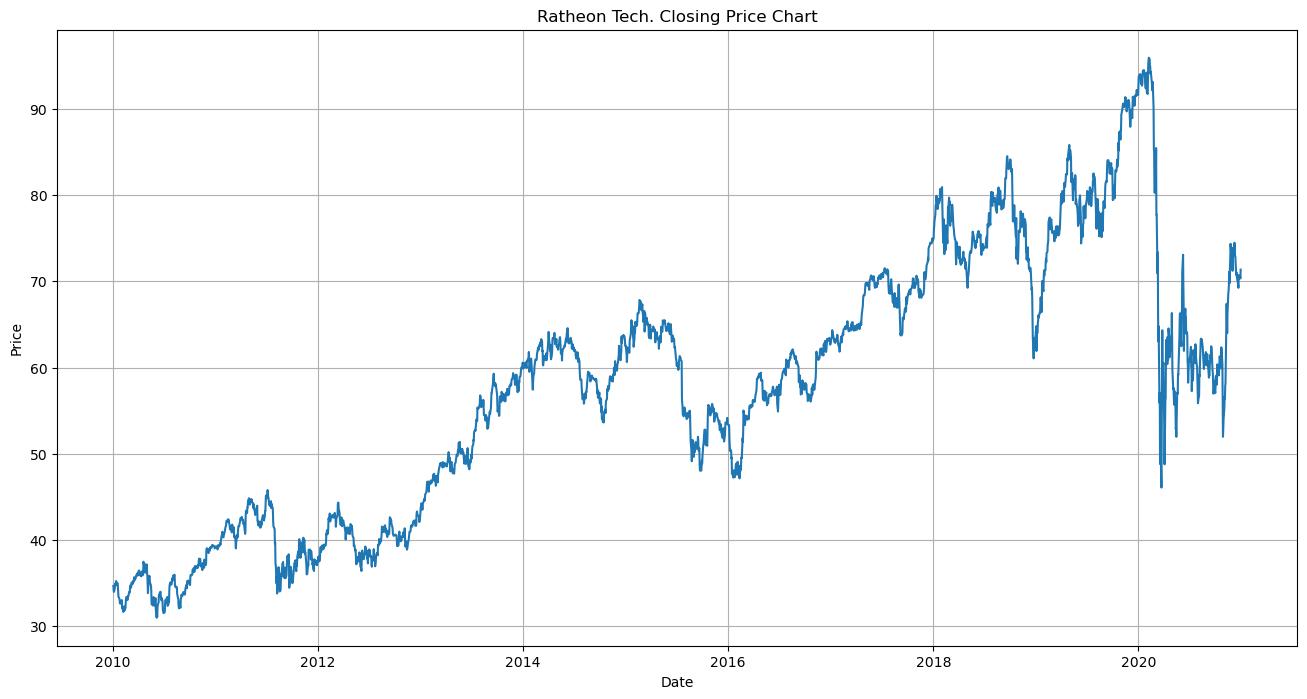

In [71]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Ratheon Tech. Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Ratheon Tech. Annual Returns 
(Last 10 years)

In [85]:
yearly = dataset.asfreq('RTX')
yearly['Returns'] = dataset['Adj Close'].pct_change().dropna()

ValueError: Invalid frequency: RTX

In [73]:
yearly = yearly.reset_index()

In [74]:
yearly['Years'] = yearly['Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [75]:
from matplotlib import dates as mdates
import datetime as dt

yearly['ReturnsPositive'] = 0 < yearly['Returns']
yearly['Date'] = pd.to_datetime(yearly['Date'])
yearly['Date'] = yearly['Date'].apply(mdates.date2n

SyntaxError: unexpected EOF while parsing (<ipython-input-75-5b44aee31517>, line 6)

In [76]:
yearly

,index,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Years,ReturnsPositive
0,0,734137.0,58.203468,58.628117,57.986629,58.528728,47.198536,1192900,0.005276,2010,True
1,1,734501.0,58.770000,59.150002,58.459999,58.480000,48.804790,1049000,-0.006962,2011,False
2,2,734868.0,66.510002,67.709999,65.870003,67.580002,58.366062,1682200,0.012283,2012,True
3,3,735233.0,114.250000,114.779999,113.849998,114.610001,101.793770,965800,0.005969,2013,True
4,4,735598.0,150.750000,151.210007,147.229996,147.389999,133.745926,1600600,-0.022353,2014,False
5,5,735963.0,189.460007,190.649994,187.550003,188.809998,174.501663,550600,-0.006682,2015,False
6,6,736328.0,232.880005,233.339996,231.710007,232.580002,218.477615,740900,-0.000215,2016,False
7,7,736692.0,308.250000,309.190002,306.910004,306.910004,292.508423,430900,-0.004476,2017,False
8,8,737059.0,243.309998,246.919998,241.720001,244.899994,237.071686,1111700,0.010939,2018,True
9,9,737424.0,348.269989,348.980011,342.730011,343.970001,338.274017,907800,-0.014610,2019,False


In [77]:
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

In [78]:
yearly_returns_avg = dataset['Returns'].groupby([dataset.index.year]).mean()

In [79]:
yearly_returns_avg

Date
2010    0.000557
2011   -0.000049
2012    0.000639
2013    0.001436
2014    0.000172
2015   -0.000543
2016    0.000687
2017    0.000732
2018   -0.000532
2019    0.001529
2020   -0.000337
Name: Returns, dtype: float64

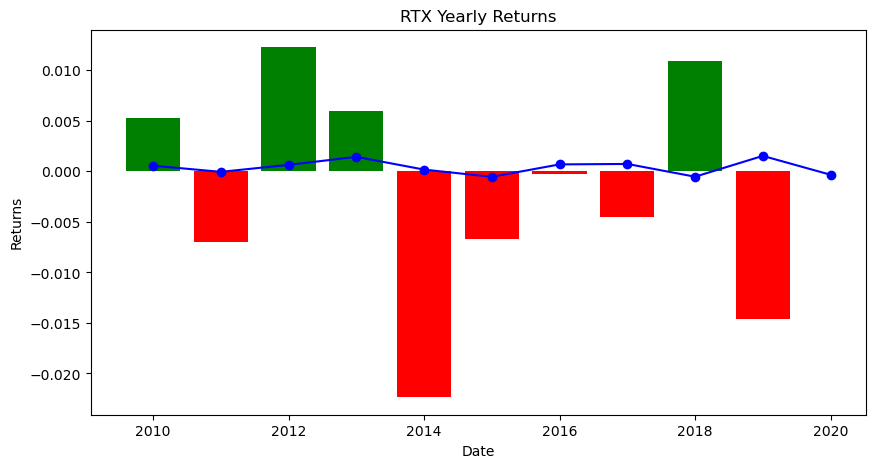

In [82]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('RTX Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.savefig('stanalysis\static\RTX_Yearly_Returns_Chart.png')
plt.show()

# Lockheed Analysis

In [86]:
# input
symbol = 'lmt'
start = '2010-01-02'
end = '2020-12-31'

# Read data 
data = yf.download(symbol,start,end)

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,75.870003,76.949997,75.519997,76.849998,53.261395,2408300
2010-01-05,76.620003,77.790001,76.550003,77.650002,53.815838,2356500
2010-01-06,76.099998,77.190002,75.849998,76.510002,53.025768,5208100
2010-01-07,76.169998,76.199997,73.610001,74.410004,51.570324,7038300
2010-01-08,74.349998,75.940002,74.320000,75.610001,52.402020,3629400


In [87]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,349.950012,355.000000,349.399994,351.600006,351.600006,1307500
2020-12-24,352.829987,354.059998,350.399994,351.970001,351.970001,508800
2020-12-28,353.109985,357.820007,351.709991,354.179993,354.179993,1023400
2020-12-29,356.000000,357.350006,351.799988,353.899994,353.899994,1055900
2020-12-30,353.000000,356.609985,353.000000,354.160004,354.160004,840800


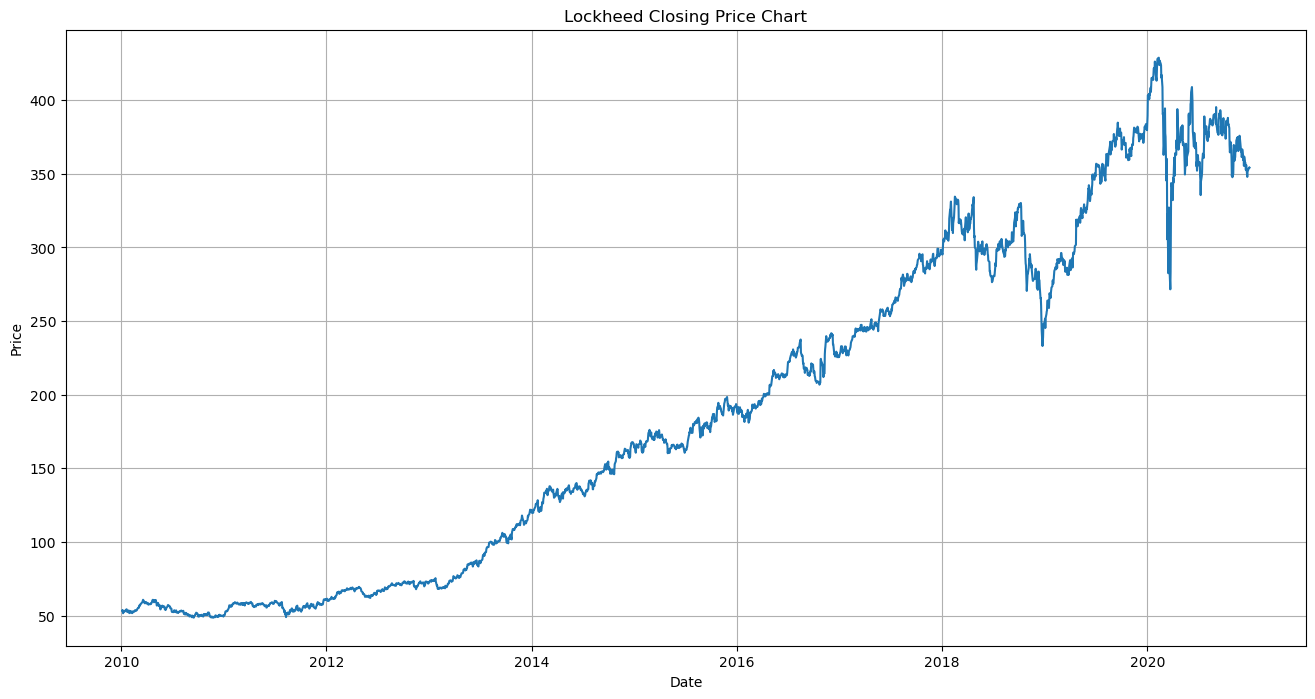

In [88]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('Lockheed Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

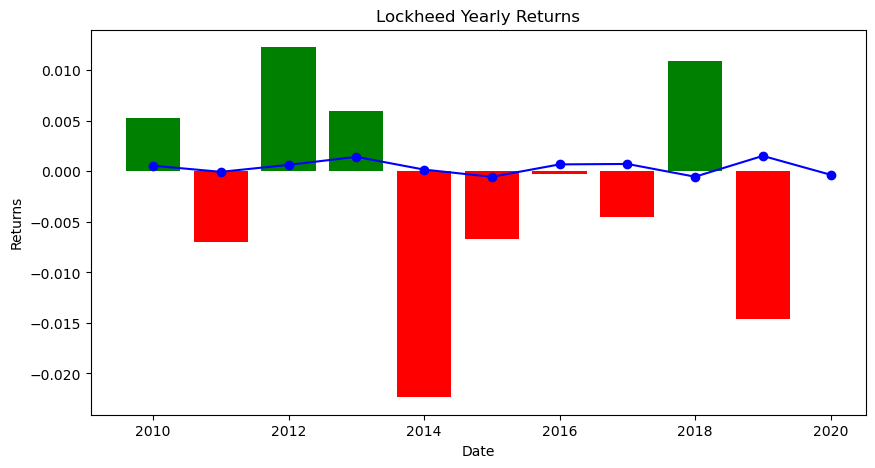

In [89]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('Lockheed Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.savefig('stanalysis\static\Lockheed_Yearly_Returns_Chart.png')
plt.show()

# Plot 2020 only¶

In [ ]:
new_dates = df['2020-01-01':'2020-12-31']
new_dates.head()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df.index, df['Adj Close'], label='Price')
ax.plot(df.index, df['SMA_20'], label = '20-days SMA')
ax.plot(df.index, df['SMA_40'], label = '40-days SMA')
ax.plot(df.index, df['SMA_80'], label = '80-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price')
ax.set_title('Stock Moving Average Trading Strategy')

In [ ]:
plt.figure(figsize=(16,10))
plt.plot_date(x=new_dates.index ,y=new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

# LeGrand S.A. Analysis

In [ ]:
# input
symbol = 'LGRVF'
start = '2010-01-02'
end = '2020-12-31'
 
# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()


In [ ]:
dataset.tail()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('LeGrand Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plot 2020 only¶

In [ ]:
new_dates = df['2020-01-01':'2020-12-31']
new_dates.head()

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

In [ ]:
plt.figure(figsize=(16,10))
plt.plot_date(x=new_dates.index ,y=new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

# General Dynamics Analysis

In [97]:
# input
symbol = 'gd'
start = '2010-01-02'
end = '2020-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Data
dataset.head()

# View Columns
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,75.870003,76.949997,75.519997,76.849998,53.261395,2408300
2010-01-05,76.620003,77.790001,76.550003,77.650002,53.815838,2356500
2010-01-06,76.099998,77.190002,75.849998,76.510002,53.025768,5208100
2010-01-07,76.169998,76.199997,73.610001,74.410004,51.570324,7038300
2010-01-08,74.349998,75.940002,74.320000,75.610001,52.402020,3629400


In [98]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,147.360001,149.399994,147.000000,148.149994,148.149994,1113800
2020-12-24,148.339996,149.149994,147.600006,149.009995,149.009995,447400
2020-12-28,149.199997,150.490005,148.360001,148.720001,148.720001,777900
2020-12-29,149.779999,149.779999,146.389999,147.550003,147.550003,1105300
2020-12-30,147.490005,149.410004,147.479996,148.300003,148.300003,995800


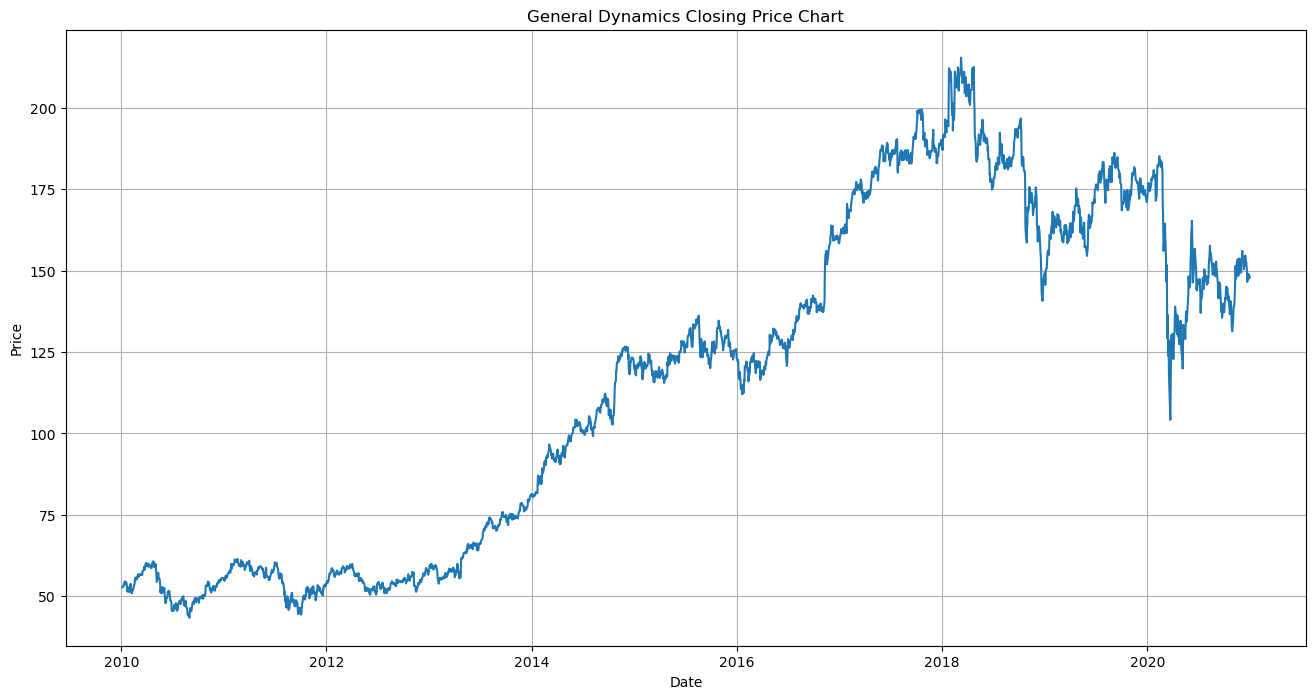

In [99]:
plt.figure(figsize=(16,8))
plt.plot(dataset['Adj Close'])
plt.title('General Dynamics Closing Price Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show() 

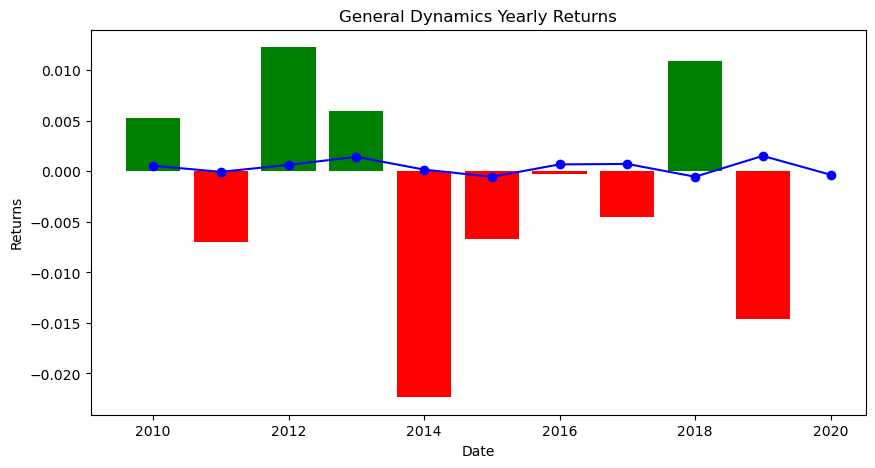

In [100]:
colors = yearly.ReturnsPositive.map({True: 'g', False: 'r'})
plt.figure(figsize=(10,5))
plt.bar(yearly['Years'], yearly['Returns'], color=colors, align='center')
plt.plot(yearly_returns_avg, marker='o', color='b')
plt.title('General Dynamics Yearly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.savefig('stanalysis\static\GD_Yearly_Returns_Chart.png')
plt.show()

# Plot 2020 only¶

In [93]:
new_dates = df['2020-01-01':'2020-12-31']
new_dates.head()

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

In [ ]:
plt.figure(figsize=(16,10))
plt.plot_date(x=new_dates.index ,y=new_dates['Adj Close'], label='Price')
plt.plot(new_dates['SMA_20'], label = '20-days SMA')
plt.plot(new_dates['SMA_40'], label = '40-days SMA')
plt.plot(new_dates['SMA_80'], label = '80-days SMA')
plt.legend(loc='best')
plt.grid(True)
plt.ylabel('Price')
plt.xlabel('Dates')
plt.title('Stock Moving Average Trading Strategy')

# Consolidated Portfolio Analysis

In [ ]:
BA = yf.download('BA', start= '2019-01-01', end ='2020-12-31')
LockheedMartin = yf.download('LMT', start= '2019-01-01', end ='2020-12-31')
NorthernGrumman = yf.download('NOC', start= '2019-01-01', end ='2020-12-31')
Ratheontech = yf.download('RTX', start= '2019-01-01', end ='2020-12-31')
leguard = yf.download('LGRVF', start= '2019-01-01', end ='2020-12-31')
GeneralDynamics = yf.download('GD', start= '2019-01-01', end ='2020-12-31')

In [ ]:
[boeing.head (), lockheed.head(), northerngrumman.head(),ratheontech.head(),leguard.head(),generaldynamics.head()]

In [ ]:
# Saving individual stock data in csv files (to be determined if necessary/not currently created)
boeing.to_csv('Data/boeing.csv', index= False)
lockheed.to_csv('Data/lockheed.csv', index = False)
northerngrumman.to_csv('Data/northerngrumman.csv', index = False)
ratheontech.to_csv('Data/ratheontech.csv', index = False)
leguard.to_csv('Data/leguard.csv', index = False)
generadynamics.to_csv('Data/generaldynamic.csv', index = False)

In [ ]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

In [ ]:
objects = [ge, boeing,lockheed,ratheontech,leguard,generaldynamics]
for obj in objects:   obj.reset_index(inplace = True)

In [ ]:
objects = [boeing,lockheed,northerngrumman,ratheontech,leguard,generaldynamics]
all_data = pd.DataFrame(date)
for obj in objects:
    all_data = pd.merge(left = all_data, right = obj, how = 'inner', on = 'Date')

In [ ]:
cols = all_data.columns
cols

In [ ]:
new_cols= ['Date','Open_ge', 'High_ge', 'Low_ge', 'Close_ge', 'Adj_Close_ge', 'Volume_ge',
           'Open_boeing', 'High_boeing', 'Low_boeing', 'Close_boeing', 'Adj_Close_boeing', 'Volume_boeing',
           'Open_lockheed', 'High_lockheed', 'Low_lockheed', 'Close_lockheed', 'Adj_Close_lockheed', 'Volume_lockheed',
           'Open_ratheontech', 'High_ratheontech', 'Low_ratheontech', 'Close_ratheontech', 'Adj_Close_ratheontech', 'Volume_ratheontech',
           'Open_leguard', 'High_leguard', 'Low_leguard', 'Close_leguard', 'Adj_Close_leguard', 'Volume_leguard',
           'Open_honeywell', 'High_honeywell', 'Low_honeywell', 'Close_honeywell', 'Adj_Close_honeywell', 'Volume_honeywell']

In [ ]:
all_data.head()

In [ ]:
all_data.shape

# Portfolio Analysis

In [ ]:
# input
# Aerospace and Defense  
symbols = ['BA',"LMT','NOC','RTX,'GD']
start = '2019-01-01'
end = '2020-04-24'

In [ ]:
# Importing datetime for setting start and end date of the stock market dataset

today = dt.today().strftime('%Y-%m-%d')
start = dt(2018,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE',],
               data_source='yahoo',
               start=start,
               end=today)

In [ ]:
today = dt.today().strftime('%Y-%m-%d')
start = dt(2017,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE','BA','LMT','RTX','LGRVF','HON',],
               data_source='yahoo',
               start=start,
               end=today)

In [ ]:
# Plotting Historical Closing price for GE and its primary competitors
def plotStocks(stocks):
    """Stock plotting function. The portfolio is drawn thicker"""
    lw = 0.5
    names = stocks.columns.values
    plt.figure(figsize=(20,10))
    for name in names:
        price = stocks[name]
        if name == 'portfolio':
            lw = 4
        else:
            lw = 0.5
        plt.plot(stocks[name],label = name,linewidth = lw) 
        
    plt.legend()

closing = stocks['Adj Close']
plotStocks(closing)

In [ ]:
#RELATIVE VALUE ANALYSIS -Instead lets look at the relative change between prices (with all stocks staring at a value of 1).
returns = closing/closing.iloc[0,:]
plotStocks(returns)

In [ ]:
# RELATIVE VALUE ANALYSIS vs Market (Bold Line). See the relative change between prices (with all stocks staring at a value of 1).Suppose we have a portfolio which is the sum of all stocks
# Once again portfolio = portfolio/portfolio[0] (capture relative movement)
portfolio = closing.sum(axis=1)
portfolio = portfolio/portfolio[0]
returns['portfolio'] = portfolio
plotStocks(returns)

In [ ]:
today = dt.today().strftime('%Y-%m-%d')
start = dt(2017,1,1).strftime('%Y-%m-%d')
stocks = web.DataReader(['GE','BA','LMT','RTX','LGRVF','HON',],
               data_source='yahoo',
               start=start,
               end=today)

In [ ]:
#calculating volatility of stocks and the portfolio
    
def computeVolatility(returns):
    perDailyChange = returns.pct_change() #percentage daily change
    logReturns = np.log(perDailyChange+1)
    volatility = logReturns.std()*np.sqrt(252)
    return volatility

computeVolatility(returns)
#So buying all stocks results in a portfolio lowers the  volatitlity making for a safer investment.

In [ ]:
import seaborn as sns

In [ ]:
logReturns = np.log(returns.pct_change()+1)
logReturnsCorr = logReturns.iloc[1:,0:-1].corr()
plt.figure(figsize=(8,8))
sns.heatmap(logReturnsCorr,annot=True);

#legrand (LGRVF) has the weakest correlation to the other 5 companies, due to its high variance

In [ ]:
#We can use the bootstrap method to take random samples of all stocks in our portfolio and aggregate
def bootstrap(stockLogReturns,nsims,periods,weights): 
    prfAvgReturn = logReturns.iloc[:,0:-1].dropna()
    prfAvgReturn = (prfAvgReturn*weights).mean(axis=1)
    bootstrap = np.empty(shape = (periods,nsims))
    for i in range(nsims):
        samp = np.random.choice(prfAvgReturn,periods)
        bootstrap[:,i] = samp

    bootstrap = 1+(pd.DataFrame(bootstrap).shift(1).fillna(0))
    return bootstrap.cumprod(axis=0)
    
#portfolio
stockLogReturns = logReturns.iloc[1:,0:-1]
plotStocks(stockLogReturns)
plt.title('Log returns',fontsize=20);

In [ ]:
#Instead of simply buying all stocks, suppose we only choose to buy certain quantities of each
# let theese be weight which sum to 1

num_stocks = returns.shape[1]-1
nfolios = 10000
performance = np.empty(shape=(nfolios,3))
weights = np.empty(shape = (nfolios,num_stocks))
for f in range(nfolios):
    w = np.random.uniform(size=num_stocks)
    w = w/w.sum()
    portfolio = (returns.iloc[:,0:-1]*w).sum(axis=1)
    portfolioLogReturn = np.log(portfolio.pct_change()+1)
    volatility = portfolioLogReturn.std()*np.sqrt(252)
    annualizedReturn = (portfolioLogReturn.mean()+1)**252 - 1
    sharpe = annualizedReturn/volatility
    entry = np.array([annualizedReturn,volatility,sharpe])
    #store metrics
    performance[f,:] = entry
    #store weights
    weights[f,:] = w

In [ ]:
performance[0:10,:]

In [ ]:
portfolios = pd.DataFrame(performance,columns=['Return','Risk','Sharpe'])
maxsharpe = np.where(portfolios.Sharpe == portfolios.Sharpe.max())

# maximum sharpe ratio portfolio
best = portfolios.iloc[maxsharpe[0][0],:]
optimalWeights = weights[maxsharpe[0][0],:]

print('best portfolio: \n',best,'\n')
print('optimal weights \n',optimalWeights)

In finance, the efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are sub-optimal because they have a higher level of risk for the defined rate of return.

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(x=portfolios.Risk,y=portfolios.Return,
            c=portfolios.Sharpe,s=20,alpha=1,
            cmap='RdYlBu')
plt.colorbar()
plt.title('Markowitz Efficient Frontier and Sharpe ratio',fontsize=14)
plt.annotate('Max sharpe',(best.Risk,best.Return),fontsize=8)
plt.xlabel('Volatility')
plt.ylabel('Return');

In finance, the Sharpe ratio (or reward-to-variability ratio) measures the performance of an investment (e.g., a security or portfolio) compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return divided by the standard deviation of the investment (i.e., its volatility). It represents the additional amount of return that an investor receives per unit of increase in risk.

In [ ]:
bestPortfolio = (returns.iloc[:,0:-1]*optimalWeights).sum(axis=1)
returns['portfolio'] = bestPortfolio/bestPortfolio[0]
plotStocks(returns)
plt.title('Highest Sharpe Ratio portfolio',fontsize=20);

In [ ]:
lowess = sm.nonparametric.lowess(exog=stockWeights.GE,endog=portfolios.Sharpe)
weights.shape
returns.iloc[:,0:-1].columns.values
stockWeights = pd.DataFrame(weights,columns = 
                           returns.iloc[:,0:-1].columns.values)

plt.figure(figsize=(20,10))
plt.scatter(x=stockWeights.TSLA,y=portfolios.Sharpe,alpha=0.1,color='blue')
plt.plot(lowess[:,0],lowess[:,1],color='lime',linewidth=3)
plt.xlabel('Weight');
plt.ylabel('Sharpe');
plt.title('GE Sharpe ratio vs Weight',fontsize=18)

#We can also plot Sharpe ratio against weight of GE stock.

In [ ]:
bs = bootstrap(stockLogReturns,1000,100,weights=optimalWeights)
qs = [0.05,0.5,0.95]
quantiles = bs.quantile(qs,axis=1)

plt.figure(figsize=(20,10))
plt.plot(bs,color = 'blue',alpha=0.06);
for q in range(3):
    plt.plot(quantiles.iloc[q,:],label=str(qs[q])+' quantile',linewidth=4);
plt.legend(fontsize = 14)
plt.title('Highest sharpe ratio portfolio bootstrap 1000 simulations',fontsize=20);
plt.hlines(1,0,100);

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import pandas_datareader.data as web
from datetime import datetime as dt
import statsmodels.api as sm

In [ ]:
import yfinance as yf

In [ ]:
tickers = ['GE','^HON']

sec_data = pd.DataFrame()

for t in tickers :
    sec_data[t] = wb.DataReader(t,'quandl','2018-1-1','2020-3-1')['AdjClose']